# Library yang digunakan

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import math
from sklearn.preprocessing import LabelEncoder

# Import Data

In [3]:
# Load csv dataset
df = pd.read_csv('Product Analysis.csv')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99996,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99997,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99998,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP


## Penjelasan Dataset

### 🛒 Data Dictionary: E-Commerce Transaction Dataset

Dataset ini berisi informasi detail mengenai transaksi, produk, pengiriman, dan profil pelanggan yang digunakan untuk analisis performa bisnis dan segmentasi RFM.

| Column Name | Data Type | Description |
| :--- | :--- | :--- |
| **order_id** | `object` | ID unik transaksi. Digunakan sebagai identitas utama & perhitungan **Frequency**. |
| **customer_id** | `object` | ID unik pelanggan. Digunakan untuk membangun profil & segmentasi RFM. |
| **order_status** | `object` | Status pesanan (*delivered, shipped, cancelled*, dll). Untuk filtering transaksi valid. |
| **order_purchase_timestamp** | `datetime64[ns]` | Waktu pesanan dibuat. Digunakan untuk menghitung **Recency**. |
| **order_approved_at** | `datetime64[ns]` | Waktu pembayaran disetujui/validasi transaksi. |
| **order_delivered_timestamp**| `datetime64[ns]` | Waktu pesanan diterima pelanggan. Untuk analisis performa pengiriman. |
| **order_estimated_delivery** | `datetime64[ns]` | Perkiraan tanggal tiba. Digunakan untuk analisis ketepatan waktu (*delay*). |
| **product_id** | `object` | ID unik produk. Digunakan untuk analisis preferensi & *product affinity*. |
| **seller_id** | `object` | ID penjual. Digunakan untuk analisis kontribusi & performa seller. |
| **price** | `float64` | Harga produk. Komponen utama **Monetary** dalam RFM. |
| **shipping_charges** | `float64` | Biaya pengiriman. Untuk melihat pengaruh ongkir terhadap keputusan beli. |
| **product_category_name** | `object` | Kategori produk (*electronics, household*, dll). Untuk segmentasi minat. |
| **product_weight_g** | `float64` | Berat produk (gram). Relevan untuk analisis logistik & biaya kirim. |
| **product_length_cm** | `float64` | Panjang produk (cm). Digunakan dalam analisis volume pengiriman. |
| **product_height_cm** | `float64` | Tinggi produk (cm). Mendukung analisis *packaging*. |
| **product_width_cm** | `float64` | Lebar produk (cm). Digunakan dalam perhitungan dimensi logistik. |
| **payment_sequential** | `int64` | Urutan pembayaran jika menggunakan lebih dari satu metode. |
| **payment_type** | `object` | Jenis pembayaran (*credit card, debit card, e-wallet*, dll). |
| **payment_installments** | `int64` | Jumlah cicilan. Menggambarkan perilaku finansial pelanggan. |
| **payment_value** | `float64` | Total nominal pembayaran. Digunakan untuk perhitungan **Monetary**. |
| **customer_zip_code** | `int64` | Kode pos pelanggan. Digunakan untuk segmentasi geografis. |
| **customer_city** | `object` | Kota pelanggan. Digunakan untuk analisis *geocluster*. |
| **customer_state** | `object` | Provinsi pelanggan. Digunakan untuk strategi distribusi regional. |

---

# Data Understanding

In [4]:
# melihat struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   customer_id                    100000 non-null  object 
 2   order_status                   100000 non-null  object 
 3   order_purchase_timestamp       100000 non-null  object 
 4   order_approved_at              100000 non-null  object 
 5   order_delivered_timestamp      98464 non-null   object 
 6   order_estimated_delivery_date  100000 non-null  object 
 7   product_id                     100000 non-null  object 
 8   seller_id                      100000 non-null  object 
 9   price                          100000 non-null  float64
 10  shipping_charges               100000 non-null  float64
 11  product_category_name          99981 non-null   object 
 12  product_weight_g               

In [5]:
# ringkasan statistik pada dataset
df.describe(include=['int64', 'float64'])

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
count,100000.000000,100000.000000,99986.000000,99986.000000,99986.000000,99986.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,519.373862,45.021183,1817.657352,31.478117,15.751065,24.961575,1.104740,2.587790,297.371103,40043.759870
std,872.859682,42.807050,2543.057379,14.562938,10.441849,11.032317,0.861195,2.552645,387.492636,30602.253486
min,0.850000,0.070000,0.000000,7.000000,2.000000,7.000000,1.000000,1.000000,0.200000,1004.000000
25%,89.100000,19.630000,396.000000,20.000000,10.000000,15.000000,1.000000,1.000000,85.360000,9655.000000
50%,159.900000,34.330000,1110.000000,30.000000,12.000000,20.000000,1.000000,1.000000,170.760000,35938.000000
75%,564.990000,54.420000,1750.000000,42.000000,22.000000,30.000000,1.000000,3.000000,336.060000,68458.000000
max,4590.000000,321.880000,30000.000000,105.000000,105.000000,105.000000,23.000000,24.000000,6929.310000,99990.000000


In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:

    # Standarisasi (Z-score)
    data_z = (df[col] - df[col].mean()) / df[col].std()

    # Drop NA jika ada
    data_z = data_z.dropna()

    # Uji KS
    stat, p = kstest(data_z, 'norm')

    print(f"Kolom: {col}")
    print(f"  Statistik uji : {stat:.4f}")
    print(f"  p-value       : {p:.6f}")

    if p > 0.05:
        print("  ➜ Data berdistribusi normal\n")
    else:
        print("  ➜ Data tidak berdistribusi normal\n")

Kolom: price
  Statistik uji : 0.2762
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: shipping_charges
  Statistik uji : 0.1764
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_weight_g
  Statistik uji : 0.2978
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_length_cm
  Statistik uji : 0.1627
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_height_cm
  Statistik uji : 0.1656
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_width_cm
  Statistik uji : 0.1881
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: payment_sequential
  Statistik uji : 0.5107
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: payment_installments
  Statistik uji : 0.2829
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: payment_value
  Statistik uji : 0.2225
  p-value       : 0.000000
  ➜ Data tidak berdistribu

Distribusi tidak normal pada data penjualan merupakan fenomena yang wajar dan umum terjadi dalam sistem e-commerce.Pola ini mencerminkan adanya ketimpangan nilai transaksi, di mana sebagian besar transaksi bernilai kecil hingga menengah, sementara sebagian kecil transaksi memiliki nilai yang jauh lebih tinggi.

In [7]:
# cek missing value
missing_percent = df.isnull().mean() * 100
missing_percent

order_id                         0.000
customer_id                      0.000
order_status                     0.000
order_purchase_timestamp         0.000
order_approved_at                0.000
order_delivered_timestamp        1.536
order_estimated_delivery_date    0.000
product_id                       0.000
seller_id                        0.000
price                            0.000
shipping_charges                 0.000
product_category_name            0.019
product_weight_g                 0.014
product_length_cm                0.014
product_height_cm                0.014
product_width_cm                 0.014
payment_sequential               0.000
payment_type                     0.000
payment_installments             0.000
payment_value                    0.000
customer_zip_code_prefix         0.000
customer_city                    0.000
customer_state                   0.000
dtype: float64

Terdapat missing value pada kolom

- order_delivered_timestamp memiliki missing value sebanyak 1.53%

- product_category_namememiliki missing value sebanyak 0.019%

- product_weight_g memiliki missing value sebanyak 0.014%

- product_length_cm memiliki missing value sebanyak 0.014%

- product_height_cm memiliki missing value sebanyak 0.014%

- product_width_cm memiliki missing value sebanyak 0.014%

In [8]:
# cek duplikasi data
df.duplicated().sum()

np.int64(96360)

In [9]:
# cek kesesuaian input data numerik
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

outlier_summary = {}

# mencari outlier menggunakan metode IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
# Filter data outlier
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    outlier_summary[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'n_outliers': outliers.shape[0],
        'percentage': (outliers.shape[0])/len(df[col])
    }
pd.DataFrame(outlier_summary)

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
lower_bound,-624.73500,-32.55500,-1635.00000,-13.00000,-8.00000,-7.50000,1.00000,-2.00000,-290.69000,-78549.5
upper_bound,1278.82500,106.60500,3781.00000,75.00000,40.00000,52.50000,1.00000,6.00000,712.11000,156662.5
n_outliers,9196.00000,6202.00000,12005.00000,537.00000,3038.00000,1215.00000,3772.00000,9246.00000,8678.00000,0.0
percentage,0.09196,0.06202,0.12005,0.00537,0.03038,0.01215,0.03772,0.09246,0.08678,0.0


# Data Cleaning

In [10]:
# menghapus duplikat data
df_cleaned = df.drop_duplicates()
print(f"Number of rows before removing duplicates: {len(df)}")
print("Sebelum:", df.shape)
print("Sesudah hapus duplicate:", df_cleaned.shape)

Number of rows before removing duplicates: 100000
Sebelum: (100000, 23)
Sesudah hapus duplicate: (3640, 23)


Duplikasi yang ditemukan, yaitu seluruh kolom memiliki nilai yang identik, termasuk kolom ID. Hal ini menunjukkan bahwa baris-baris tersebut bukan entri transaksi yang berbeda, melainkan pengulangan data yang sama.

Karena data yang terduplikasi tidak memberikan informasi tambahan, maka dilakukan proses penghapusan duplikat. Dengan demikian, hanya tersisa sekitar 3.640 data unik setelah proses penghapusan duplikat.

In [11]:
# menghapus missing value pada beberapa kolom
df_cleaned = df.dropna(subset=['product_category_name','product_weight_g','product_length_cm','product_height_cm','product_width_cm'])

jumlah missing value berada dibawah 5%, lebih baik dihapus. Oleh karena itu, sebagian besar kolom dengan missing value diputuskan untuk dihapus (drop) karena jumlahnya relatif kecil dan tidak memengaruhi struktur utama dataset.

Namun, terdapat pengecualian pada kolom order_delivered_timestamp. Missing value pada kolom terebut terjadi,disebabkan oleh status pesanan tertentu seperti:

- canceled
- invoiced
- processing
- shipped

Pesanan dengan status tersebut memang secara logis belum memiliki waktu pengiriman (delivered timestamp), sehingga nilai kosong pada kolom tersebut merupakan kondisi yang wajar dan mencerminkan proses bisnis, bukan kesalahan data.

In [12]:
# cek missing value
pd.isnull(df_cleaned).sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp        1536
order_estimated_delivery_date       0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
product_category_name               0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [13]:
# Daftar kolom yang ingin diubah formatnya menjadi tanggal
date_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_timestamp', 
    'order_estimated_delivery_date'
]

# Mengubah kolom menjadi format datetime
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

# Mengecek kembali tipe data untuk memastikan sudah berubah menjadi datetime64[ns]
print(df_cleaned[date_columns].dtypes)

# Contoh: Jika ingin menampilkan format tertentu (misal: YYYY-MM-DD) sebagai string baru
# df_cleaned['order_date_only'] = df_cleaned['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

print("\nFormat tanggal berhasil diperbarui!")

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_timestamp        datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Format tanggal berhasil diperbarui!


/var/folders/1k/sdmmxldn72x7m1dp7r9vnbg80000gn/T/ipykernel_4141/3863498584.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')
/var/folders/1k/sdmmxldn72x7m1dp7r9vnbg80000gn/T/ipykernel_4141/3863498584.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')
/var/folders/1k/sdmmxldn72x7m1dp7r9vnbg80000gn/T/ipykernel_4141/3863498584.py:11: SettingWithCopyWarning: 
A value is tryi

In [14]:
df_cleaned.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_timestamp        datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
seller_id                                object
price                                   float64
shipping_charges                        float64
product_category_name                    object
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_zip_code_prefix                

# Exploratory Data Analysis

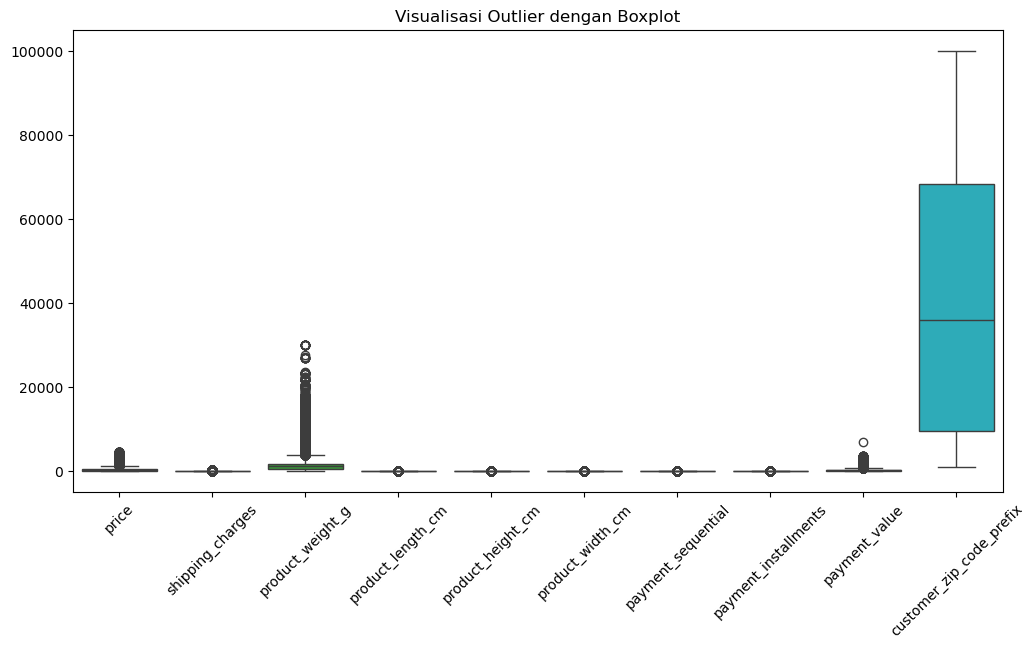

In [15]:
#visualisasi outlier dengan boxpolot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45) # Memutar label agar tidak bertumpukan
plt.title("Visualisasi Outlier dengan Boxplot")
plt.show()

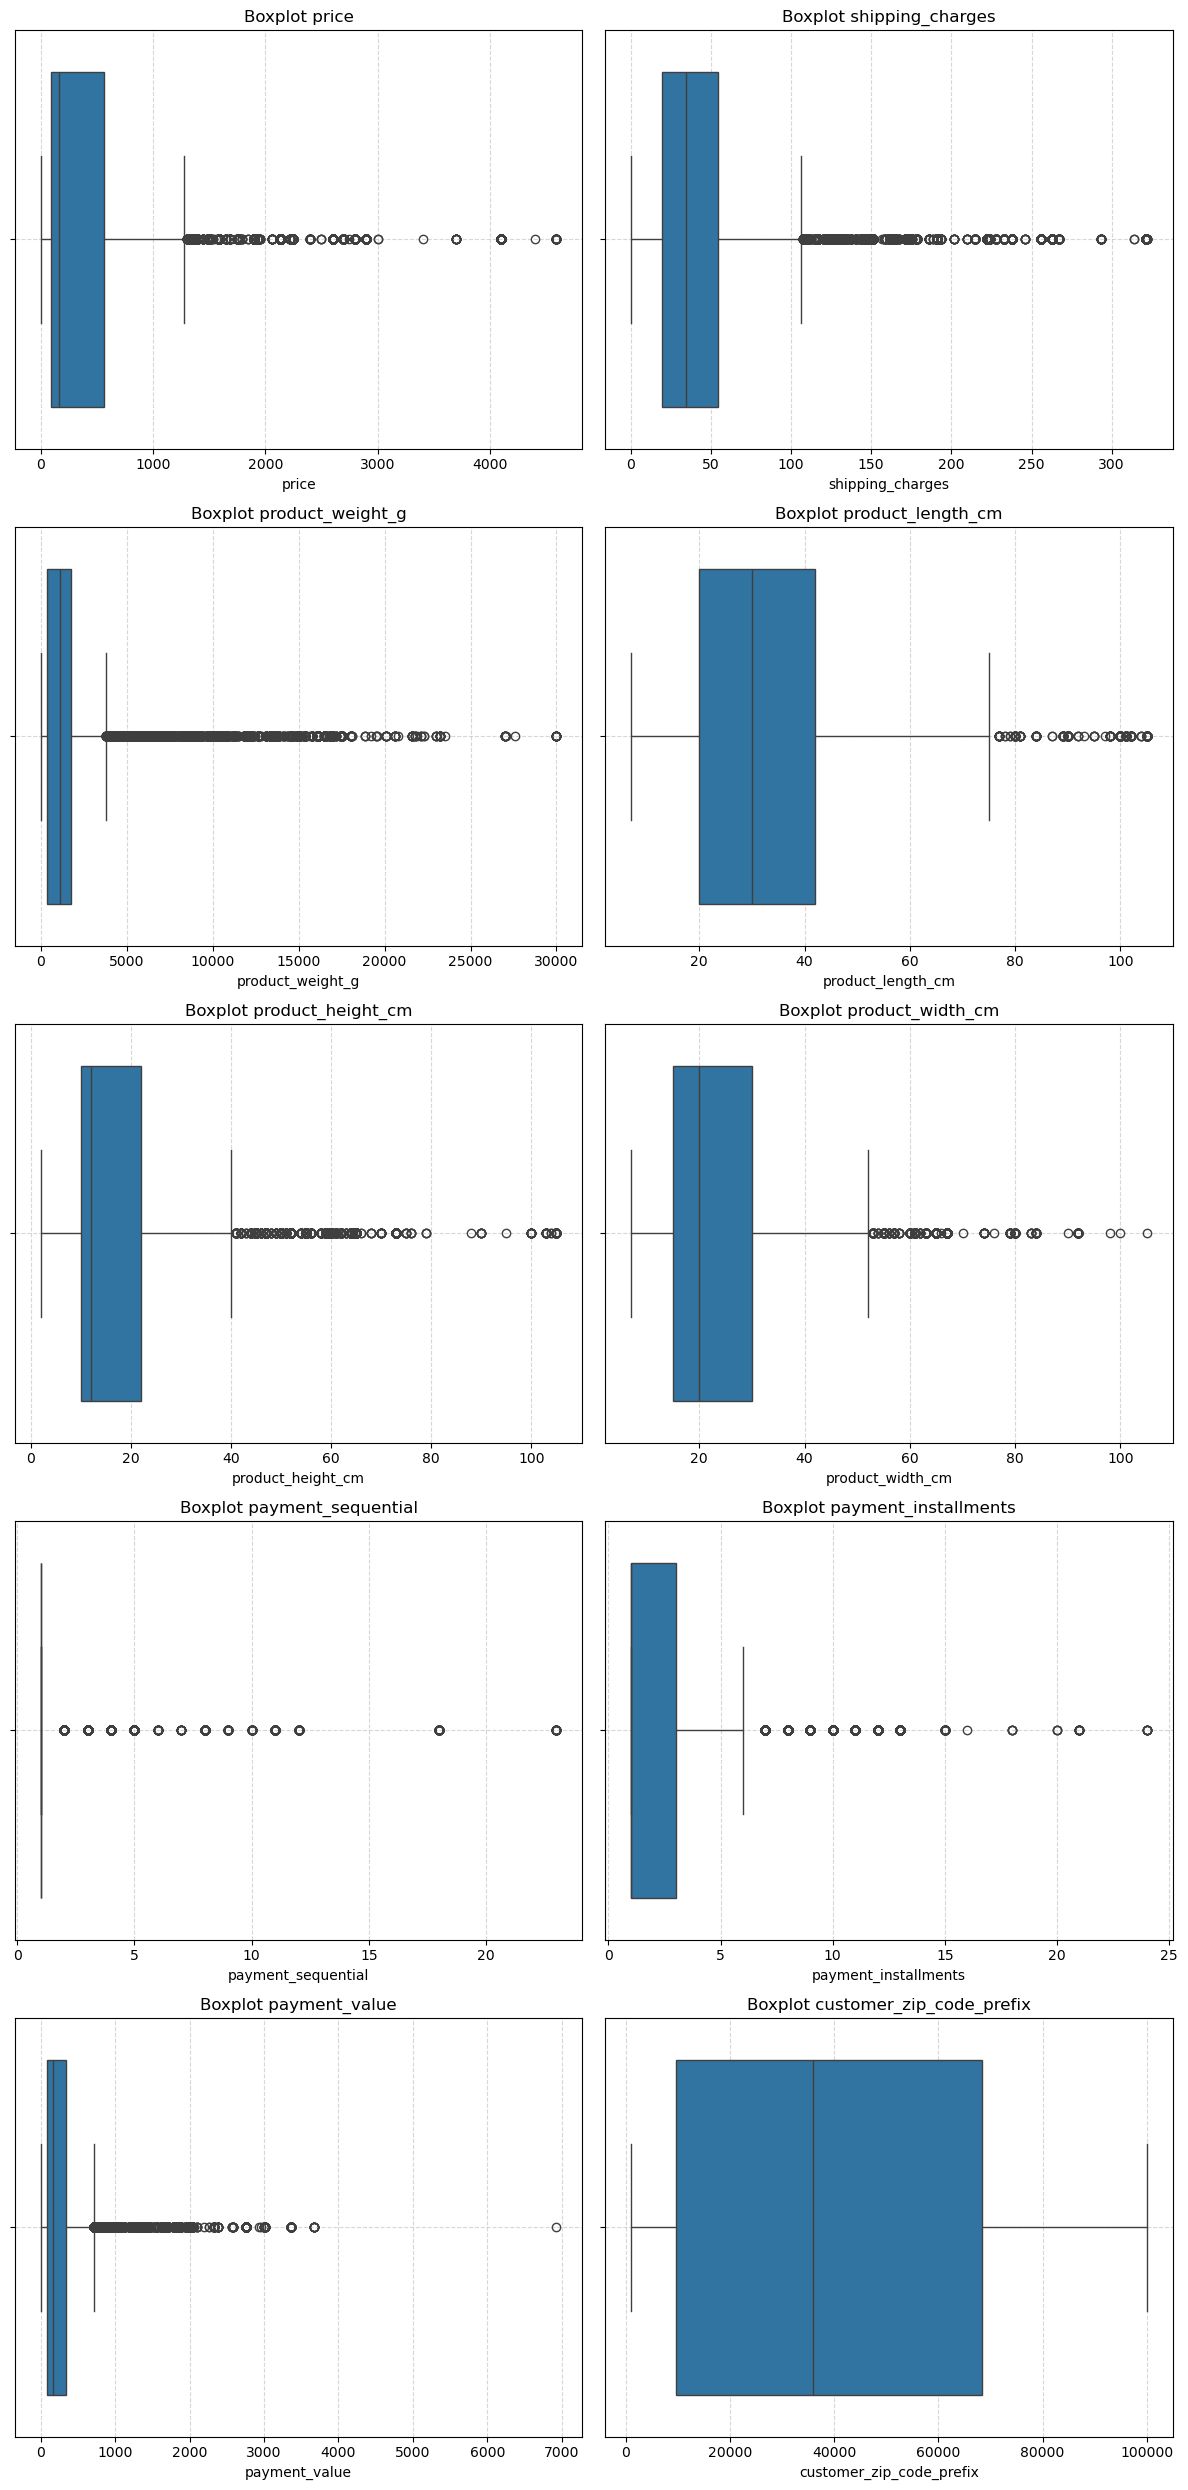

In [16]:
# Ambil semua kolom integer
int_cols = df_cleaned.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Tentukan jumlah kolom
n_cols = len(int_cols)

# Tentukan jumlah baris (2 plot per baris)
n_rows = math.ceil(n_cols / 2)

# Buat subplot
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))

# Ubah axes jadi 1D array supaya mudah di-loop
axes = axes.flatten()

# Loop untuk membuat boxplot tiap kolom
for i, col in enumerate(int_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hapus subplot kosong jika jumlah kolom ganjil
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
df_raw = df_cleaned.copy()

In [18]:
encoding = [   # kolom kategorikal yang akan di encoding
    'order_status',
    'product_category_name',
    'payment_type',
    'customer_city',
    'customer_state'

]


label_encoders = {} # Membuat dictionary untuk menyimpan objek LabelEncoder untuk tiap kolom

for col in encoding:
    le = LabelEncoder() # Membuat instance LabelEncoder baru
    df_raw[col] = le.fit_transform(df_raw[col])
    label_encoders[col] = le   # Menyimpan LabelEncoder di dictionary supaya bisa memeriksa mapping label seperti kategori label 1 itu apa


In [19]:
non = [
    'price',
    'shipping_charges',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'payment_sequential',
    'payment_installments',
    'payment_value',
    'customer_zip_code_prefix'
]

In [20]:
df_final = df_raw[non + encoding]
df_final.head()

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_status,product_category_name,payment_type,customer_city,customer_state
0,223.51,84.65,491.0,19.0,12.0,16.0,1,1,259.14,58125,1,52,0,881,23
1,223.51,84.65,491.0,19.0,12.0,16.0,1,1,259.14,58125,1,52,0,881,23
2,223.51,84.65,491.0,19.0,12.0,16.0,1,1,259.14,58125,1,52,0,881,23
3,223.51,84.65,491.0,19.0,12.0,16.0,1,1,259.14,58125,1,52,0,881,23
4,223.51,84.65,491.0,19.0,12.0,16.0,1,1,259.14,58125,1,52,0,881,23


In [21]:
for col, le in label_encoders.items():
    print(f"\nKolom: {col}") # Menampilkan nama kolom yang sedang dicek
    label_mapping = pd.DataFrame({ # Membuat tabel dataframe untuk melihat mapping antara angka hasil labeling dan kategori asli
        'Label': le.transform(le.classes_), # Mengubah kategori asli ke angka sesuai encoder
        'Kategori_Asli': le.classes_  # Menampilkan kategori asli
    })
    print(label_mapping)


Kolom: order_status
   Label Kategori_Asli
0      0      canceled
1      1     delivered
2      2      invoiced
3      3    processing
4      4       shipped

Kolom: product_category_name
    Label                            Kategori_Asli
0       0               agro_industry_and_commerce
1       1                         air_conditioning
2       2                                    audio
3       3                                     auto
4       4                                     baby
5       5                           bed_bath_table
6       6                   books_general_interest
7       7                           books_imported
8       8                          books_technical
9       9                               cine_photo
10     10                                computers
11     11                    computers_accessories
12     12                           consoles_games
13     13          construction_tools_construction
14     14                construction_tools_li

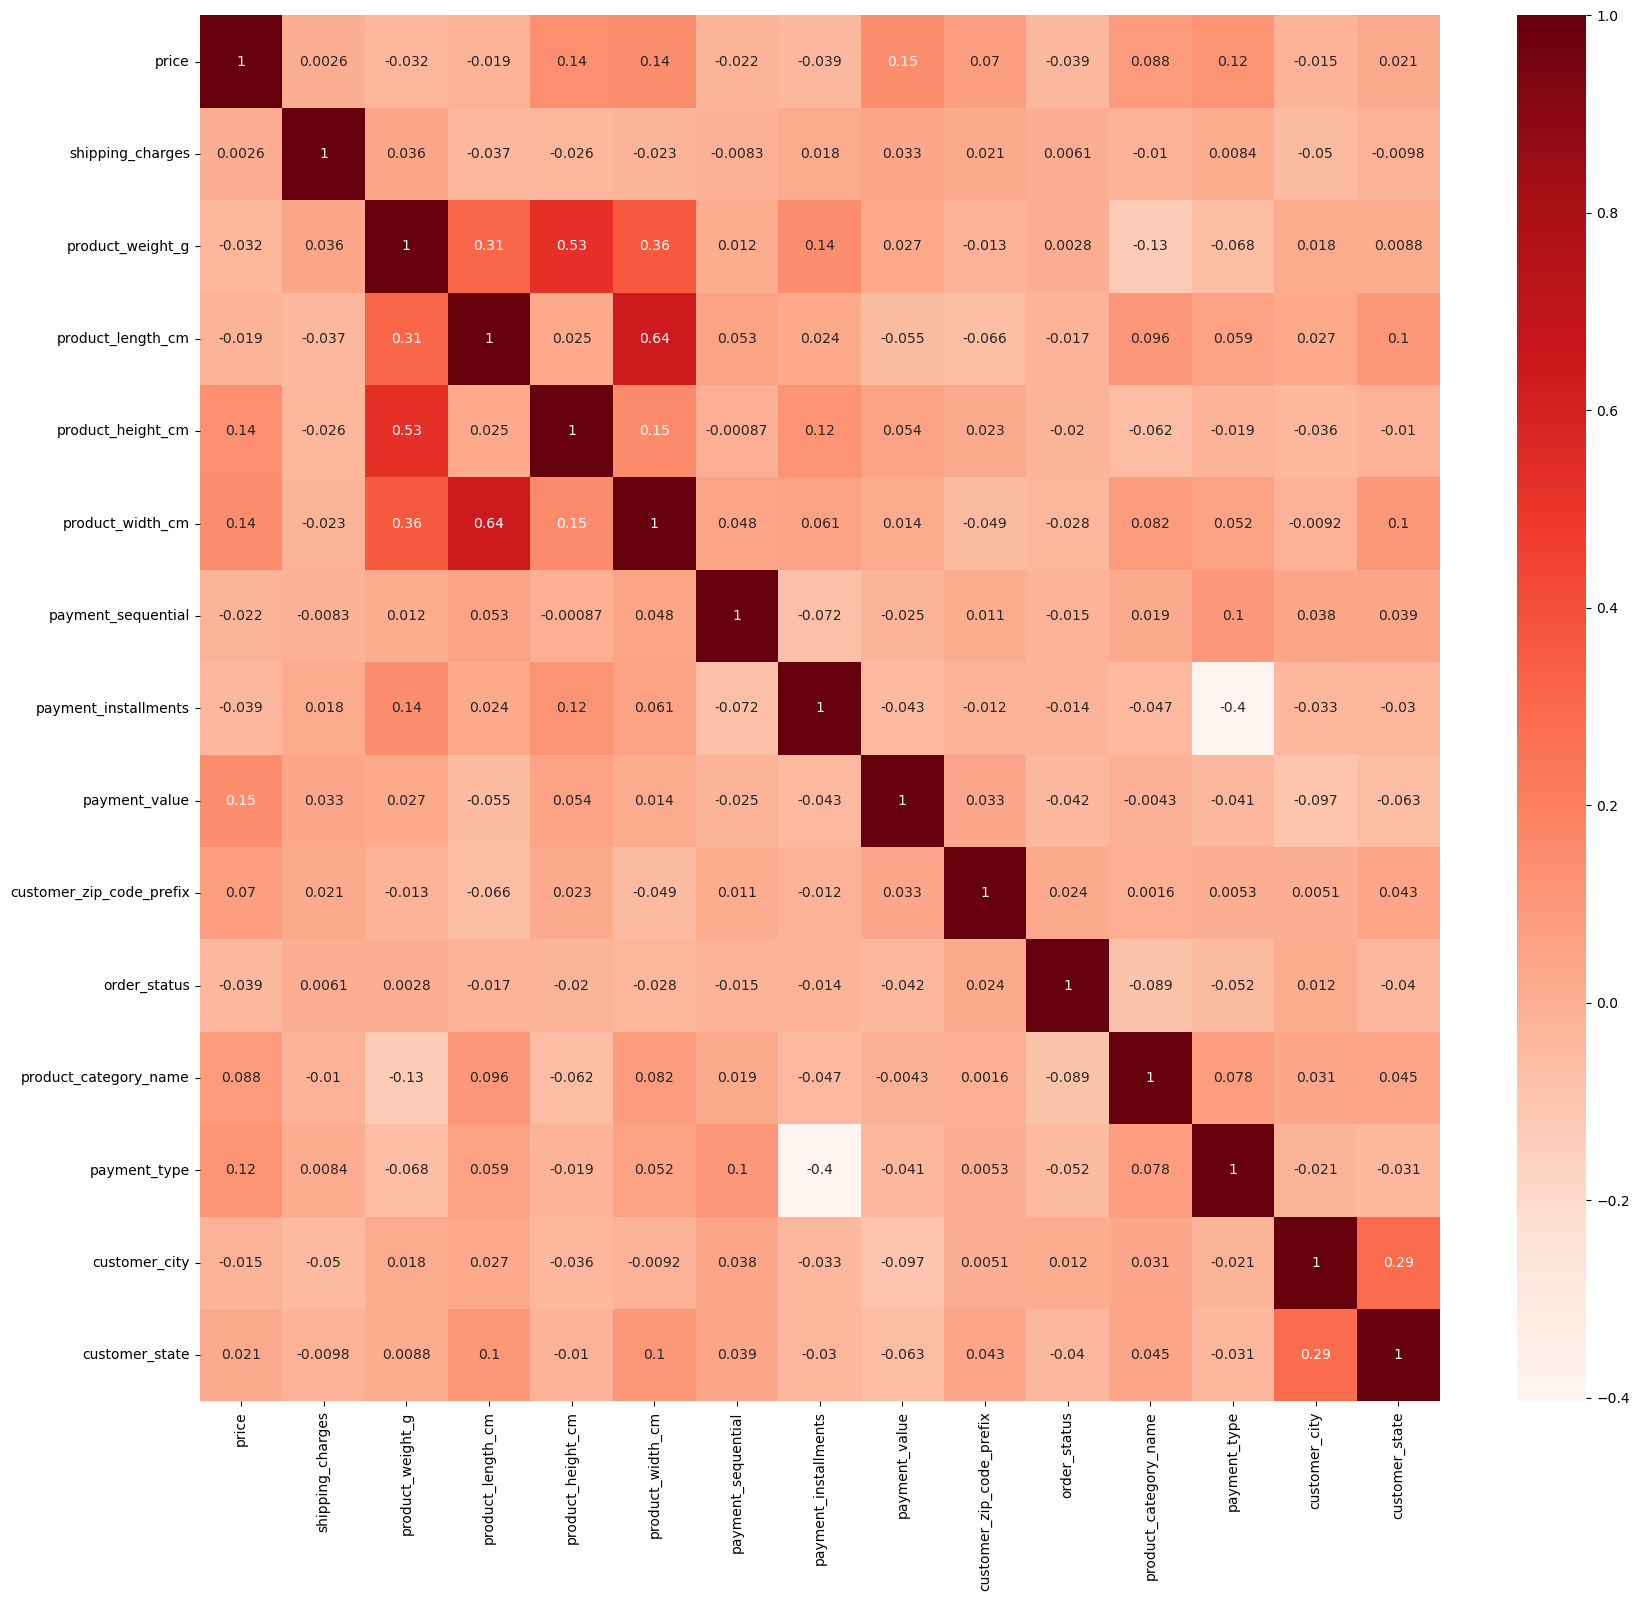

In [22]:
plt.figure(figsize=(20, 18))

# Hitung matriks korelasi
co_mtx = df_final.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="Reds", annot=True)

# Menampilkan heatmap
plt.show()

In [23]:
# menyimpan kedalam excel
df_cleaned.to_excel("produk-customer.xlsx", index=False)